# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [362]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
with open('yearinfo.json', 'r') as json_file: #use python JSON to load the data
  yearinfo = json.load(json_file)
print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [363]:
year = yearinfo['2019'] #Displaying the key values
year[:5] #first 5 key vales

[{'band_singer': ['Lil Nas X', 'Billy Ray Cyrus'],
  'ranking': 1,
  'song': ['/wiki/Old_Town_Road'],
  'songurl': ['Old Town Road'],
  'titletext': '"Old Town Road"',
  'url': ['/wiki/Lil_Nas_X', '/wiki/Billy_Ray_Cyrus']},
 {'band_singer': ['Post Malone', 'Swae Lee'],
  'ranking': 2,
  'song': ['/wiki/Sunflower_(Post_Malone_and_Swae_Lee_song)'],
  'songurl': ['Sunflower (Post Malone and Swae Lee song)'],
  'titletext': '"Sunflower"',
  'url': ['/wiki/Post_Malone', '/wiki/Swae_Lee']},
 {'band_singer': ['Halsey (singer)'],
  'ranking': 3,
  'song': ['/wiki/Without_Me_(Halsey_song)'],
  'songurl': ['Without Me (Halsey song)'],
  'titletext': '"Without Me"',
  'url': ['/wiki/Halsey_(singer)']},
 {'band_singer': ['Billie Eilish'],
  'ranking': 4,
  'song': ['/wiki/Bad_Guy_(Billie_Eilish_song)'],
  'songurl': ['Bad Guy (Billie Eilish song)'],
  'titletext': '"Bad Guy"',
  'url': ['/wiki/Billie_Eilish']},
 {'band_singer': ['Post Malone'],
  'ranking': 5,
  'song': ['/wiki/Wow_(Post_Malone_so

In [364]:
#checking number of year range
yearinfo.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [365]:
#finding number of songs per year
len(yearinfo['2019'])

100

In [366]:
#column names
yearinfo['2019'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [367]:
#checking value format stored 
yearinfo['2019'][0].values()

dict_values([['Lil Nas X', 'Billy Ray Cyrus'], ['/wiki/Old_Town_Road'], ['Old Town Road'], 1, '"Old Town Road"', ['/wiki/Lil_Nas_X', '/wiki/Billy_Ray_Cyrus']])

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [368]:
data_list = [] #list
for key, values in yearinfo.items(): # updating all the data point in the data_list
  for i in values:
    data_list.append(list(i.values()) + [key])
type(data_list)    

list

In [369]:
df = pd.DataFrame(data_list) #list is converted to dataframe
df.head(1)

0                       1                 2  3          4  \
0  [Kesha]  [/wiki/Tik_Tok_(song)]  [Tik Tok (song)]  1  "Tik Tok"   

               5     6  
0  [/wiki/Kesha]  2010

In [370]:
df.columns = ['band_singer','song','songurl','ranking','titletext','url','year'] # Rename all the columns
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [371]:
df.isnull().sum() # To checks the null values

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [372]:
df.dtypes # Data types

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [373]:
#Changing dtypes
df.year = df.year.astype('int')

In [374]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [375]:
lst = [] #list
for values in df['band_singer']:
  lst.append(values)
print(lst)


[['Kesha'], ['Lady Antebellum'], ['Train (band)'], ['Katy Perry', 'Snoop Dogg'], ['Usher (musician)', 'Will.i.am'], ['B.o.B', 'Hayley Williams'], ['Eminem', 'Rihanna'], ['Lady Gaga'], ['Taio Cruz'], ['Taio Cruz', 'Ludacris'], ['B.o.B', 'Bruno Mars'], ['Enrique Iglesias', 'Pitbull (rapper)'], ['Young Money', 'Lloyd (singer)'], ['Jason Derulo'], ['Rihanna'], ['Lady Gaga', 'Beyoncé'], ['Katy Perry'], ['Bruno Mars'], ['Mike Posner'], ['The Black Eyed Peas'], ['Jay-Z', 'Alicia Keys'], ['Usher (musician)', 'Pitbull (rapper)'], ['Travie McCoy', 'Bruno Mars'], ['Eminem'], ['Iyaz'], ['David Guetta', 'Akon'], ['The Script'], ['Kesha'], ['The Black Eyed Peas'], ['Owl City'], ['Trey Songz', 'Fabolous'], ['Drake (rapper)'], ['Lady Gaga'], ['Jason Derulo'], ['Nelly'], ['Ludacris'], ['Far East Movement', 'The Cataracs', 'Dev (singer)'], ['Timbaland', 'Justin Timberlake'], ['Michael Bublé'], ['Flo Rida', 'David Guetta'], ['Jay Sean', 'Lil Wayne'], ['La Roux'], ['Jason Derulo'], ['Justin Bieber', 'Luda

In [376]:
# makke the nested list to a single list
singlelst = [item for elem in lst for item in elem]
singlelst[:2] # Showing first two item from single list

['Kesha', 'Lady Antebellum']

In [377]:
singer_df = pd.DataFrame(singlelst) # Convert the list to dataframe
singer_df.columns = ['band_singer']
singer_df.head(5)

band_singer
0            Kesha
1  Lady Antebellum
2     Train (band)
3       Katy Perry
4       Snoop Dogg

In [378]:
df['band_singer'] = singer_df['band_singer'] # replace old dataframe with new one
df.head()

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [379]:
best_singer = df['band_singer'].value_counts()[:20] #Determine highest frequcies band_singer top 20
best_singer

Rihanna             31
Drake (musician)    29
Nicki Minaj         25
Taylor Swift        18
Lil Wayne           18
Chris Brown         17
Maroon 5            16
Justin Bieber       16
Bruno Mars          16
Katy Perry          15
Usher (musician)    13
Pitbull (rapper)    12
Kesha               11
Adele               11
Calvin Harris       11
Ariana Grande       11
Drake (rapper)      11
The Weeknd          11
Jason Derulo        10
Wiz Khalifa         10
Name: band_singer, dtype: int64

Text(0, 0.5, 'Frequencies')

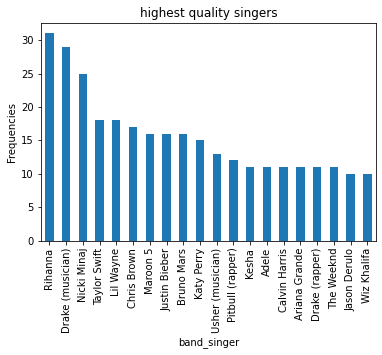

In [380]:
#Ploting bar graph
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.DataFrame(best_singer)
data['band_singer'].plot(kind="bar")
plt.title("highest quality singers")
plt.xlabel("band_singer")
plt.ylabel("Frequencies")

**Question: Who is the most profilic singer?**



### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [381]:
mr_data = df # creat a new dataframe
mr_data.head(5)

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [382]:
ranking = mr_data.ranking[0] # getting a single ranking value
type(ranking)
print(type(ranking))

<class 'numpy.int64'>


In [383]:
def get_ranking(ranking):
  score = 101 - ranking #new score column
  return score

mr_data['score'] = mr_data.ranking.map(get_ranking)
mr_data.head(5)

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  score  
0                              [/wiki/Kesha]  2010    100  
1                    [/wiki/Lady_Antebellum]  2010     99  
2                       [/wiki/Train_(band)]  2010     98  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010     97  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010     96

In [384]:
mr_data.sort_values(['score'],ascending = False, inplace = True) # Sort the score column
mr_data.head()

band_singer                         song                songurl  \
0                Kesha       [/wiki/Tik_Tok_(song)]       [Tik Tok (song)]   
100          Shontelle  [/wiki/Rolling_in_the_Deep]  [Rolling in the Deep]   
1100          Yo Gotti    [/wiki/Levitating_(song)]    [Levitating (song)]   
1000  Usher (musician)      [/wiki/Blinding_Lights]      [Blinding Lights]   
900       Shawn Mendes        [/wiki/Old_Town_Road]        [Old Town Road]   

      ranking              titletext  \
0           1              "Tik Tok"   
100         1  "Rolling in the Deep"   
1100        1           "Levitating"   
1000        1      "Blinding Lights"   
900         1        "Old Town Road"   

                                           url  year  score  
0                                [/wiki/Kesha]  2010    100  
100                              [/wiki/Adele]  2011    100  
1100                          [/wiki/Dua_Lipa]  2021    100  
1000                        [/wiki/The_Weeknd]  2020    100  
900   [/wiki/Lil_Nas_X, /wiki/Billy_Ray_Cyrus]  2019    100

In [385]:
total_data = mr_data[['band_singer','score']] # new dataframe total_data
total_data.head()

band_singer  score
0                Kesha    100
100          Shontelle    100
1100          Yo Gotti    100
1000  Usher (musician)    100
900       Shawn Mendes    100

In [386]:
score = total_data.groupby('band_singer').sum()
total = score.sort_values(by = 'score', ascending = False)
total = total['score'][:20]

Text(0.5, 1.0, 'Top 20 singers')

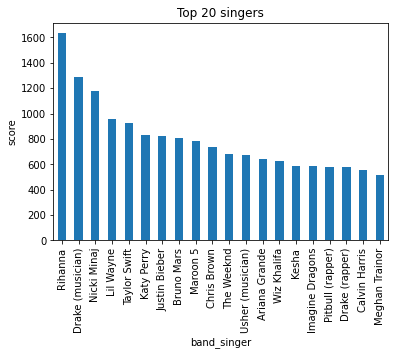

In [387]:
# Plot bar graph
top_20 = pd.DataFrame(total)
top_20['score'].plot(kind = "bar")
plt.ylabel('score')
plt.title("Top 20 singers")

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.


Question;


Find the top singers with most frequency in a given year 2019
 

In [388]:
#Total groups
len(df.groupby('year'))

12

In [389]:
df.head(5)

band_singer                         song                songurl  \
0                Kesha       [/wiki/Tik_Tok_(song)]       [Tik Tok (song)]   
100          Shontelle  [/wiki/Rolling_in_the_Deep]  [Rolling in the Deep]   
1100          Yo Gotti    [/wiki/Levitating_(song)]    [Levitating (song)]   
1000  Usher (musician)      [/wiki/Blinding_Lights]      [Blinding Lights]   
900       Shawn Mendes        [/wiki/Old_Town_Road]        [Old Town Road]   

      ranking              titletext  \
0           1              "Tik Tok"   
100         1  "Rolling in the Deep"   
1100        1           "Levitating"   
1000        1      "Blinding Lights"   
900         1        "Old Town Road"   

                                           url  year  score  
0                                [/wiki/Kesha]  2010    100  
100                              [/wiki/Adele]  2011    100  
1100                          [/wiki/Dua_Lipa]  2021    100  
1000                        [/wiki/The_Weeknd]  2020    100  
900   [/wiki/Lil_Nas_X, /wiki/Billy_Ray_Cyrus]  2019    100

In [390]:
new_df = df[['band_singer','ranking','year']] # new df frame is created
y = new_df.groupby('year') #Grouping the new frame by year
y = y.get_group(2019)
highest_frequency = y['band_singer'].value_counts(sort = True)[:10] # Finding top 10 high frequency from a group
highest_frequency

Drake (musician)    6
The Weeknd          5
Shawn Mendes        3
DJ Snake            3
Selena Gomez        3
Ariana Grande       3
Meghan Trainor      3
Justin Bieber       3
Daya (singer)       2
Adele               2
Name: band_singer, dtype: int64

In [391]:
y_2019 = pd.DataFrame(highest_frequency) #Converting series to DataFrame
y_2019

band_singer
Drake (musician)            6
The Weeknd                  5
Shawn Mendes                3
DJ Snake                    3
Selena Gomez                3
Ariana Grande               3
Meghan Trainor              3
Justin Bieber               3
Daya (singer)               2
Adele                       2

In [392]:
#Plotting bar
y_2019['band_singer'].plot(kind = "bar")
plt.title("Top 10 singers of the year 2019")
plt.ylabel('Frequency')
plt.xlabel('band_singer')

Text(0.5, 0, 'band_singer')